In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
# sns.set_style(rc={'font.family': ['sans-serif'],'axis.labelsize': 20})
# sns.set_context("notebook")

from scipy.fftpack import fft

FFT example

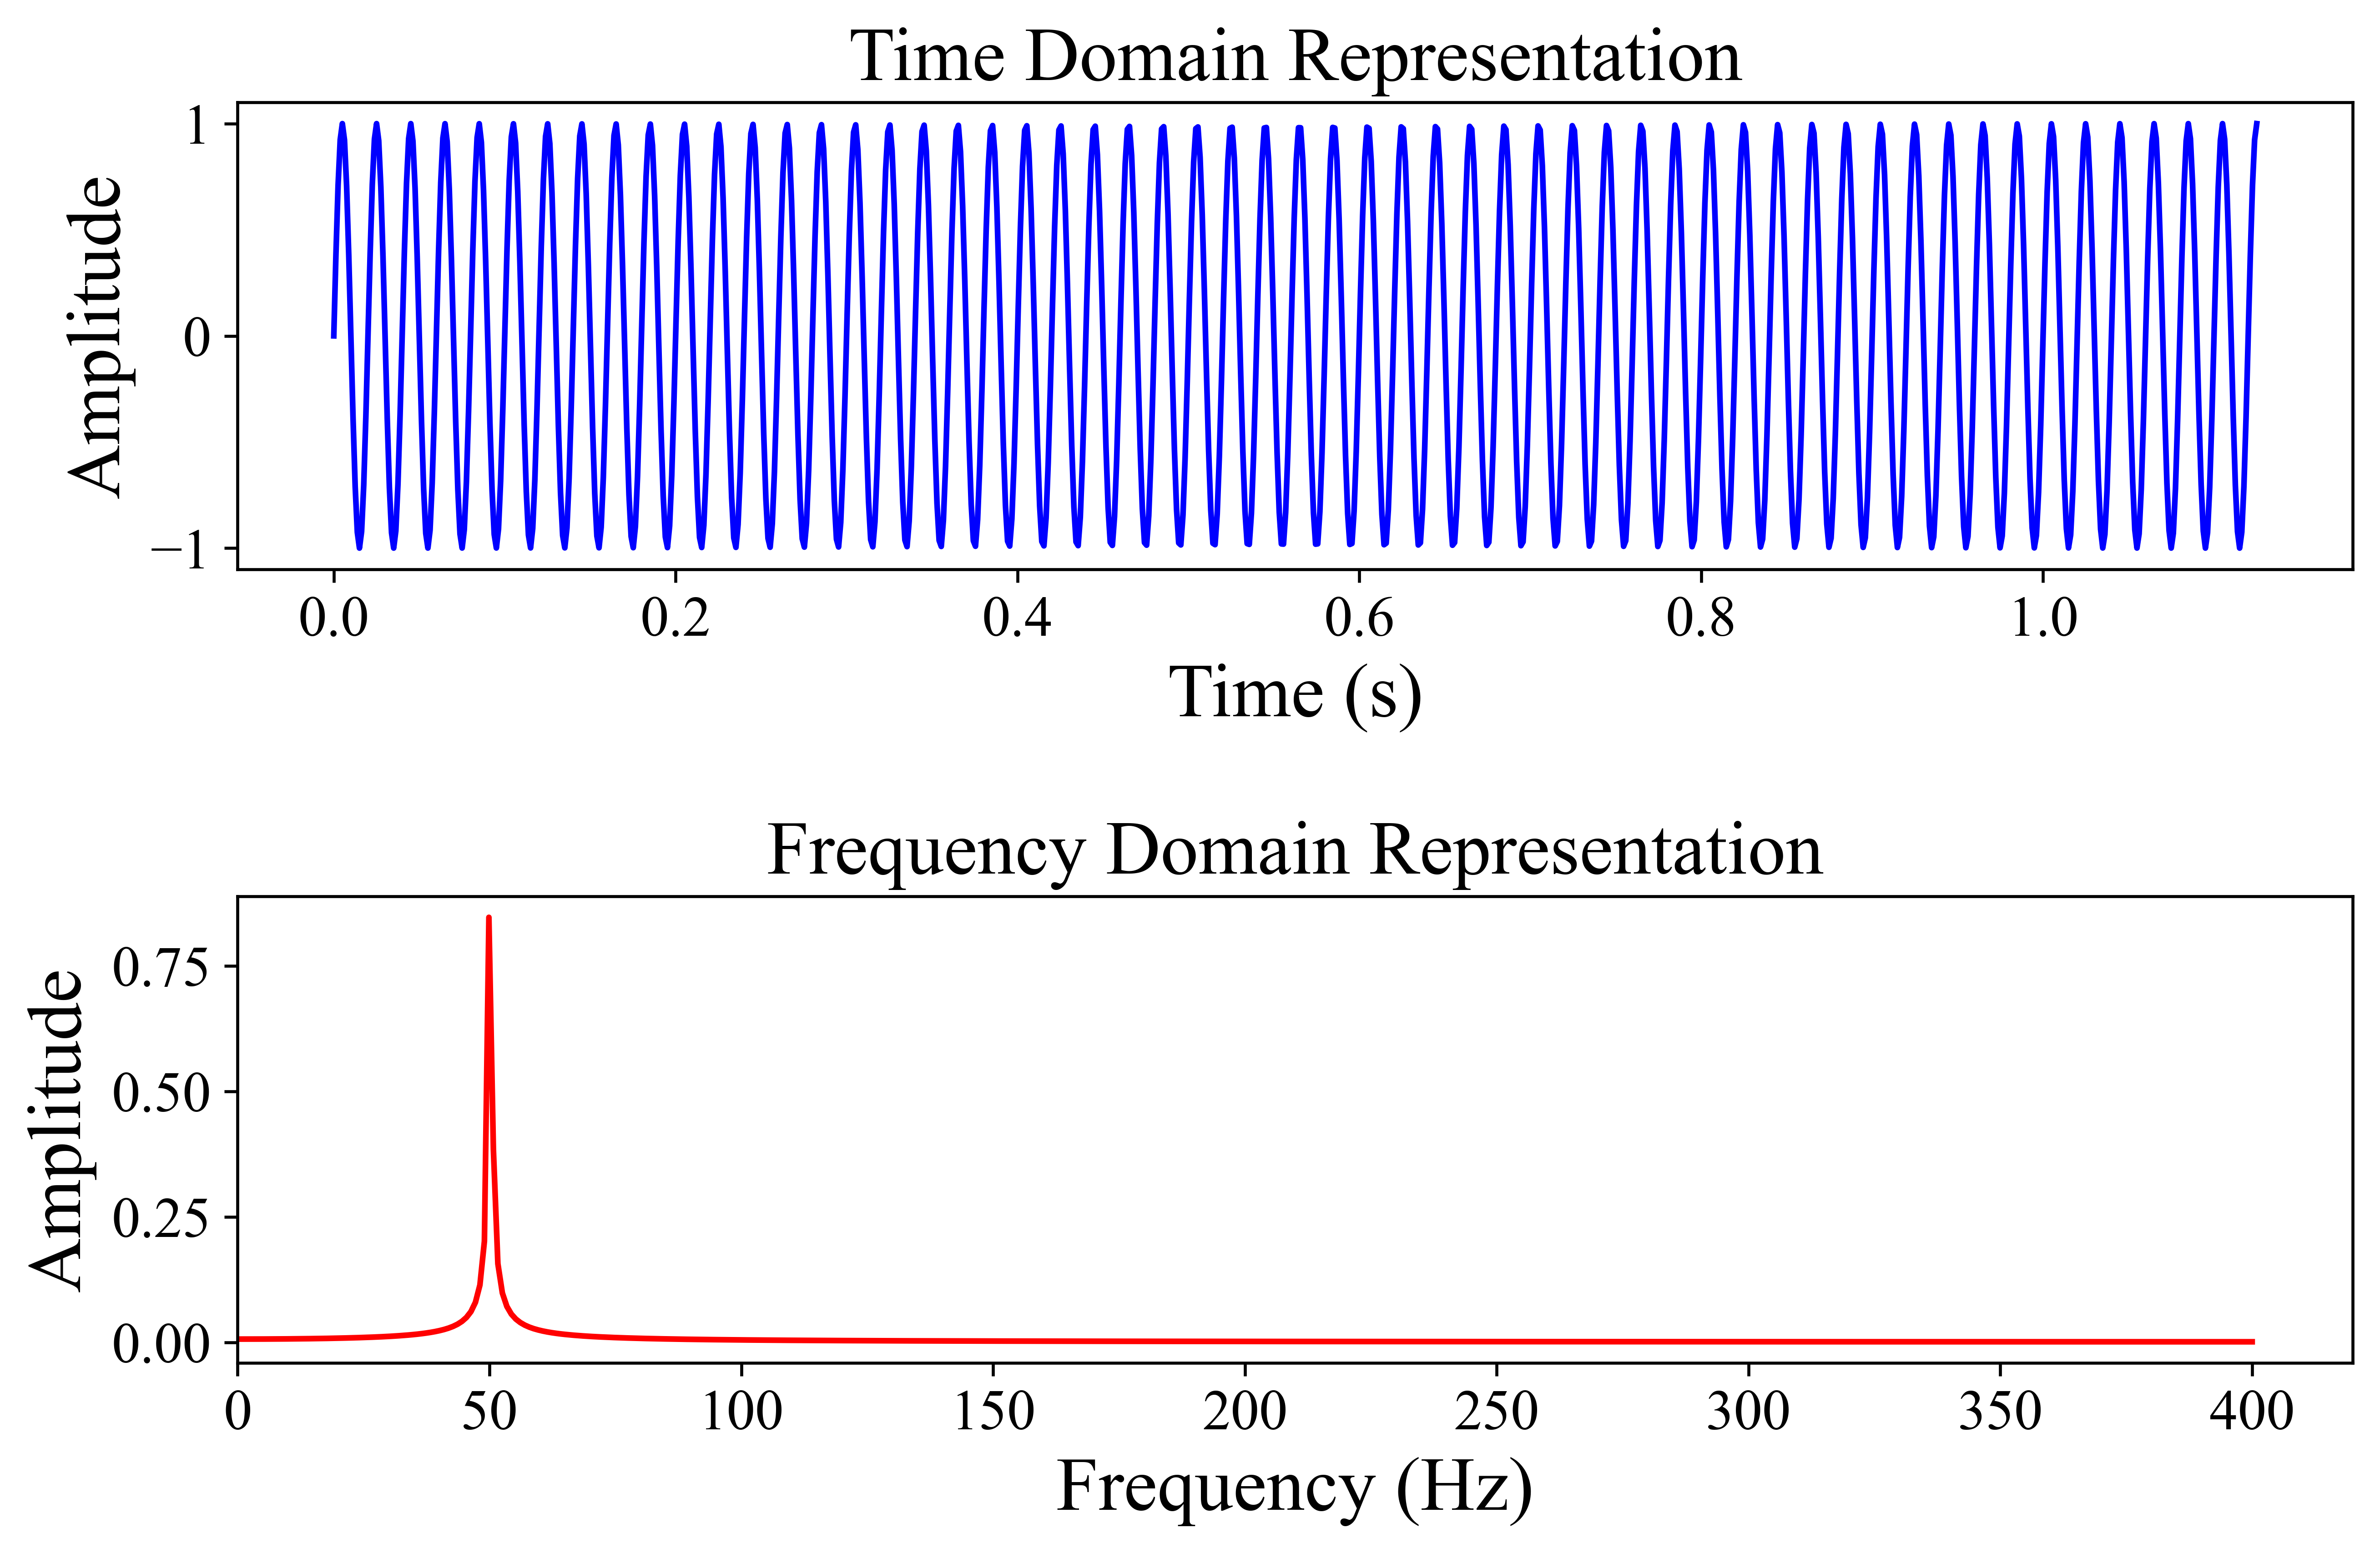

In [263]:
# Large data size for sinusidal basis function

N = 900
T = 1/800
f = 50.0

x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x)

# Fast Fourier Transform of basis function
yf = fft(y)
xf = np.linspace(0.0, (1/(2*T)), int(N/2))

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.7)
ax1.plot(x, y, 'blue')
ax1.set_xlabel('Time (s)', fontsize=20)
ax1.set_ylabel('Amplitude', fontsize=20)
ax1.set_title('Time Domain Representation',fontsize=20)
ax1.tick_params(axis='both', labelsize=15)

final_yf = (2/N)*np.abs(yf[0:int(N/2)])
ax2.plot(xf, final_yf, 'red')
ax2.set_xlim(0, )
ax2.set_xlabel('Frequency (Hz)', fontsize=20)
ax2.set_ylabel('Amplitude', fontsize=20)
ax2.set_title('Frequency Domain Representation', fontsize=20)
ax2.tick_params(axis='both', labelsize=15)
plt.show()

Understimate with small data size

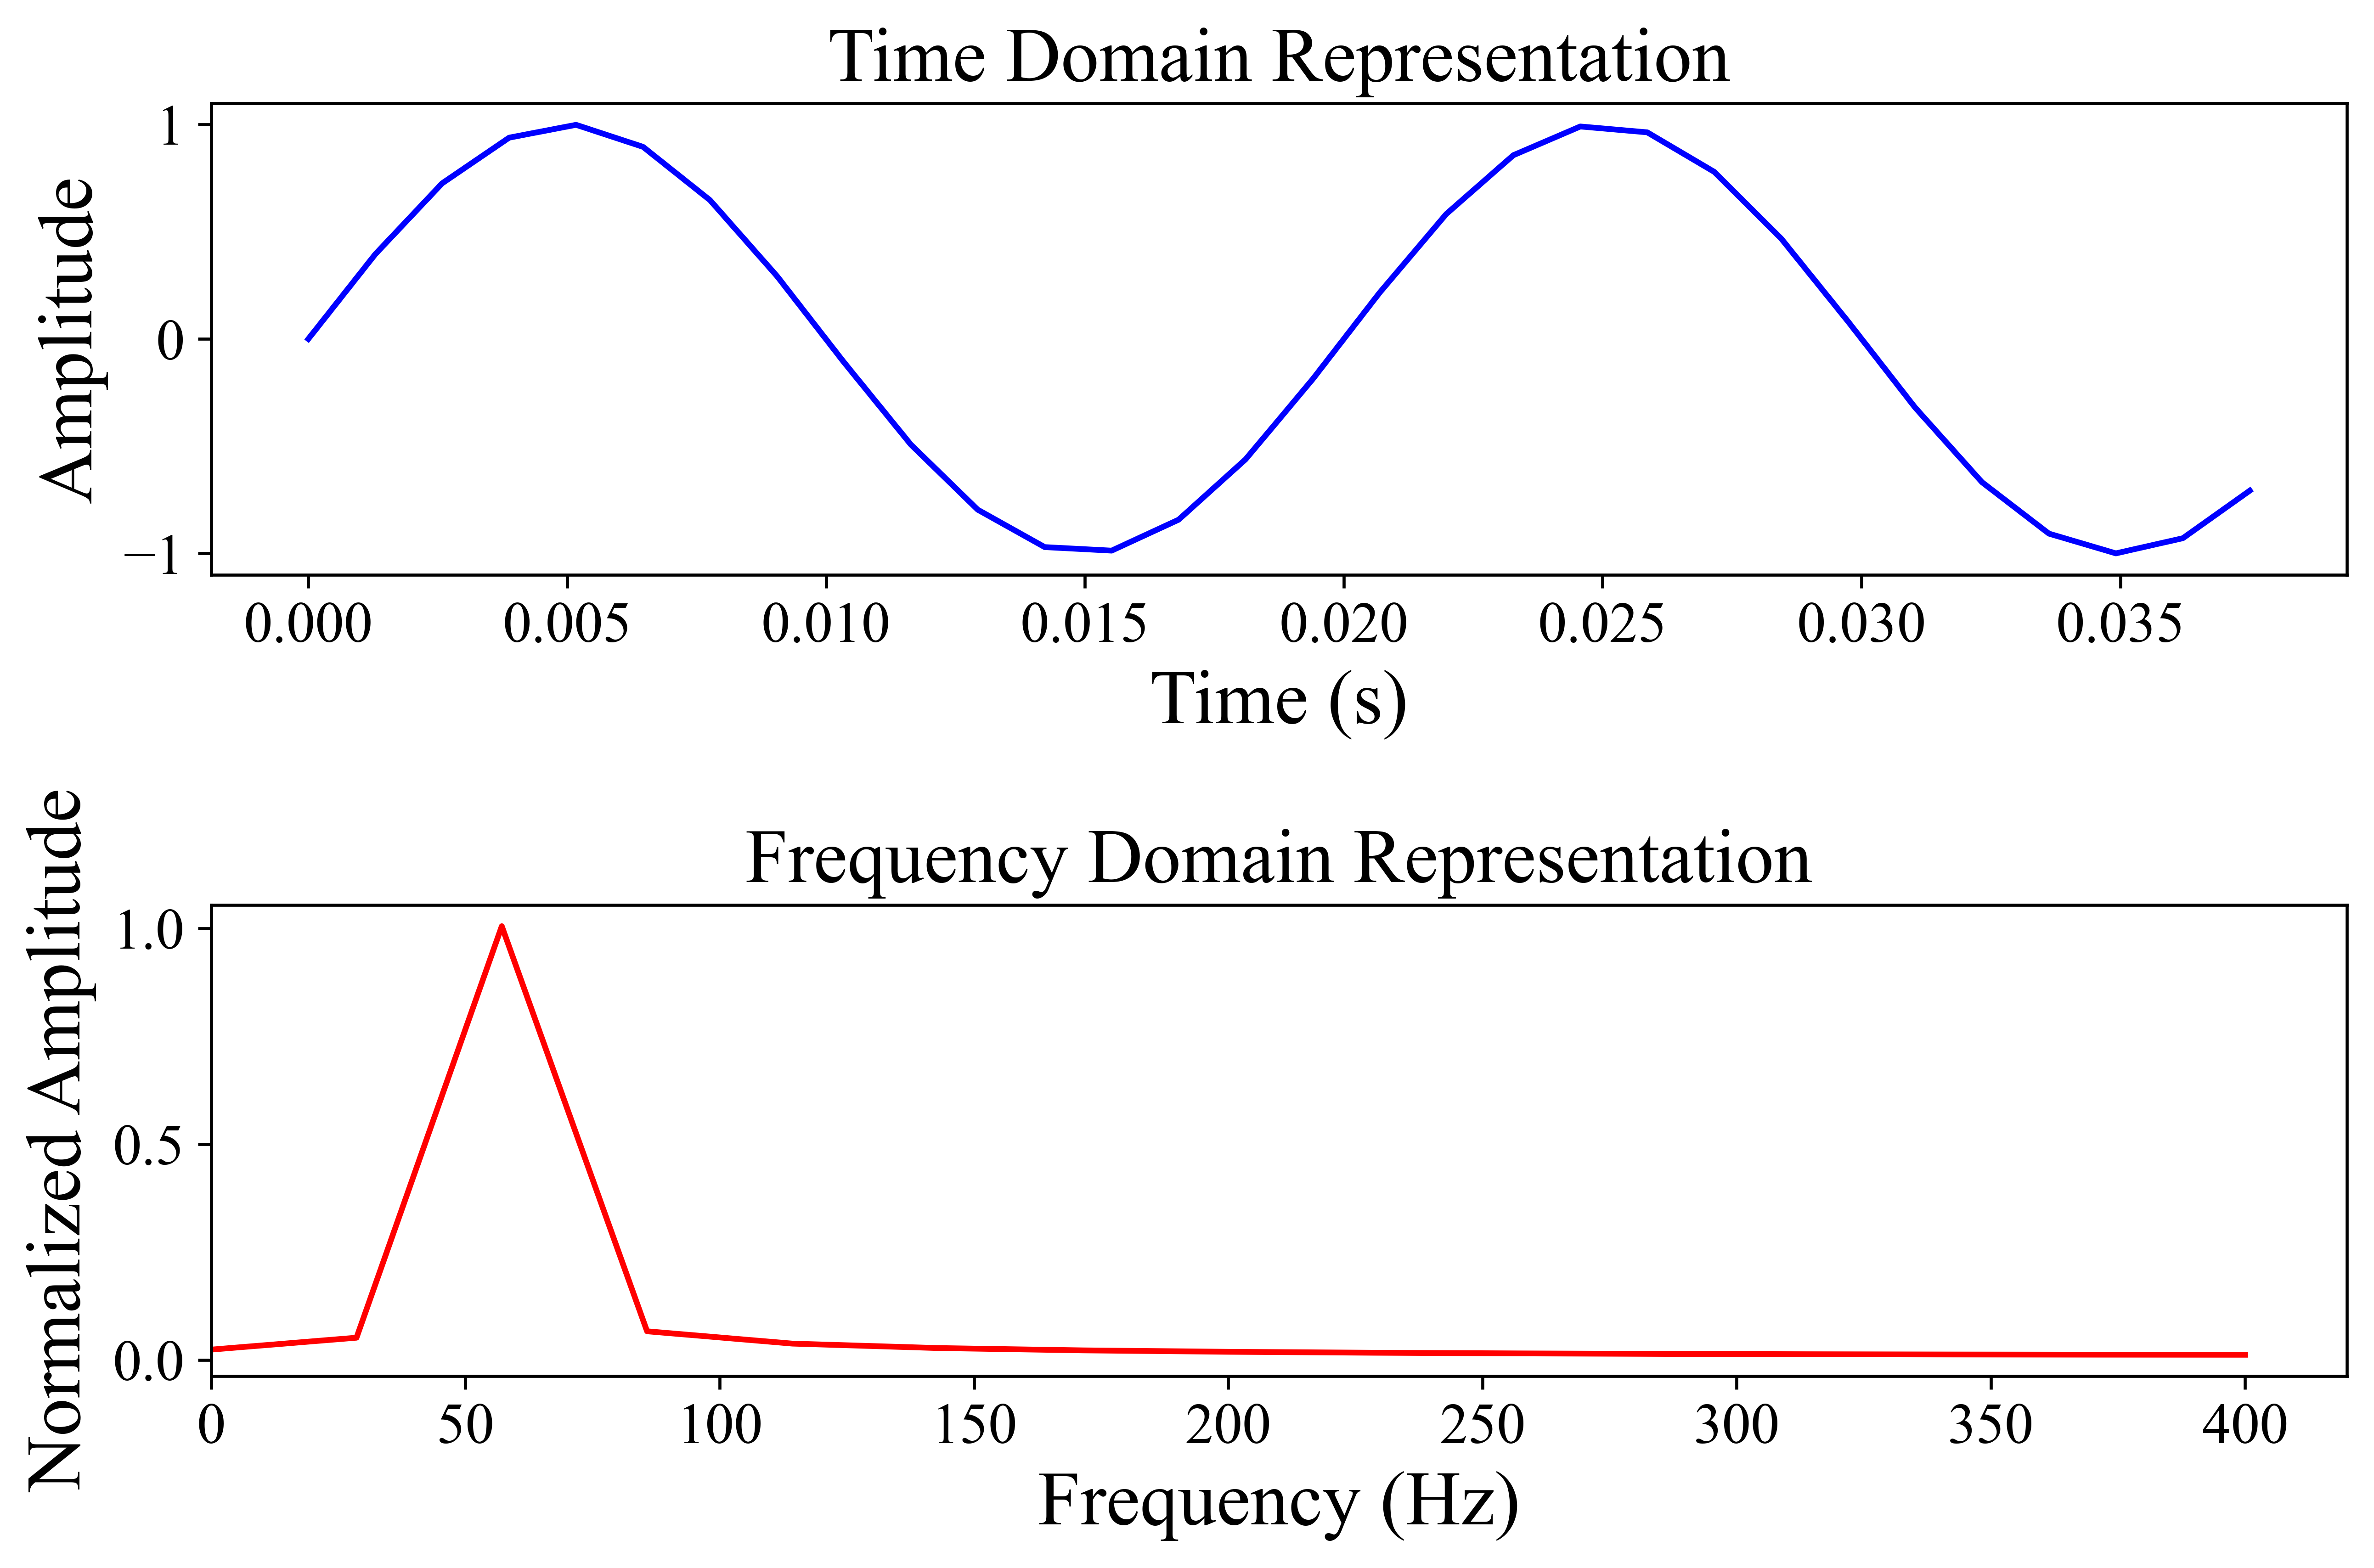

In [232]:
N = 30
T = 1.0 / 800.0
f = 50.0

x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.7)
ax1.plot(x, y, 'blue')
ax1.set_xlabel('Time (s)', fontsize=20)
ax1.set_ylabel('Amplitude', fontsize=20)
ax1.set_title('Time Domain Representation',fontsize=20)
ax1.tick_params(axis='both', labelsize=15)

final_yf = (2/N)*np.abs(yf[0:int(N/2)])
ax2.plot(xf, final_yf, 'red')
ax2.set_xlim(0, )
ax2.set_xlabel('Frequency (Hz)', fontsize=20)
ax2.set_ylabel('Normalized Amplitude', fontsize=20)
ax2.set_title('Frequency Domain Representation', fontsize=20)
ax2.tick_params(axis='both', labelsize=15)
plt.show()

Zero Padding

To increase the resolution and span the total observation, we zero-pad the the data set, adding zero to its end.

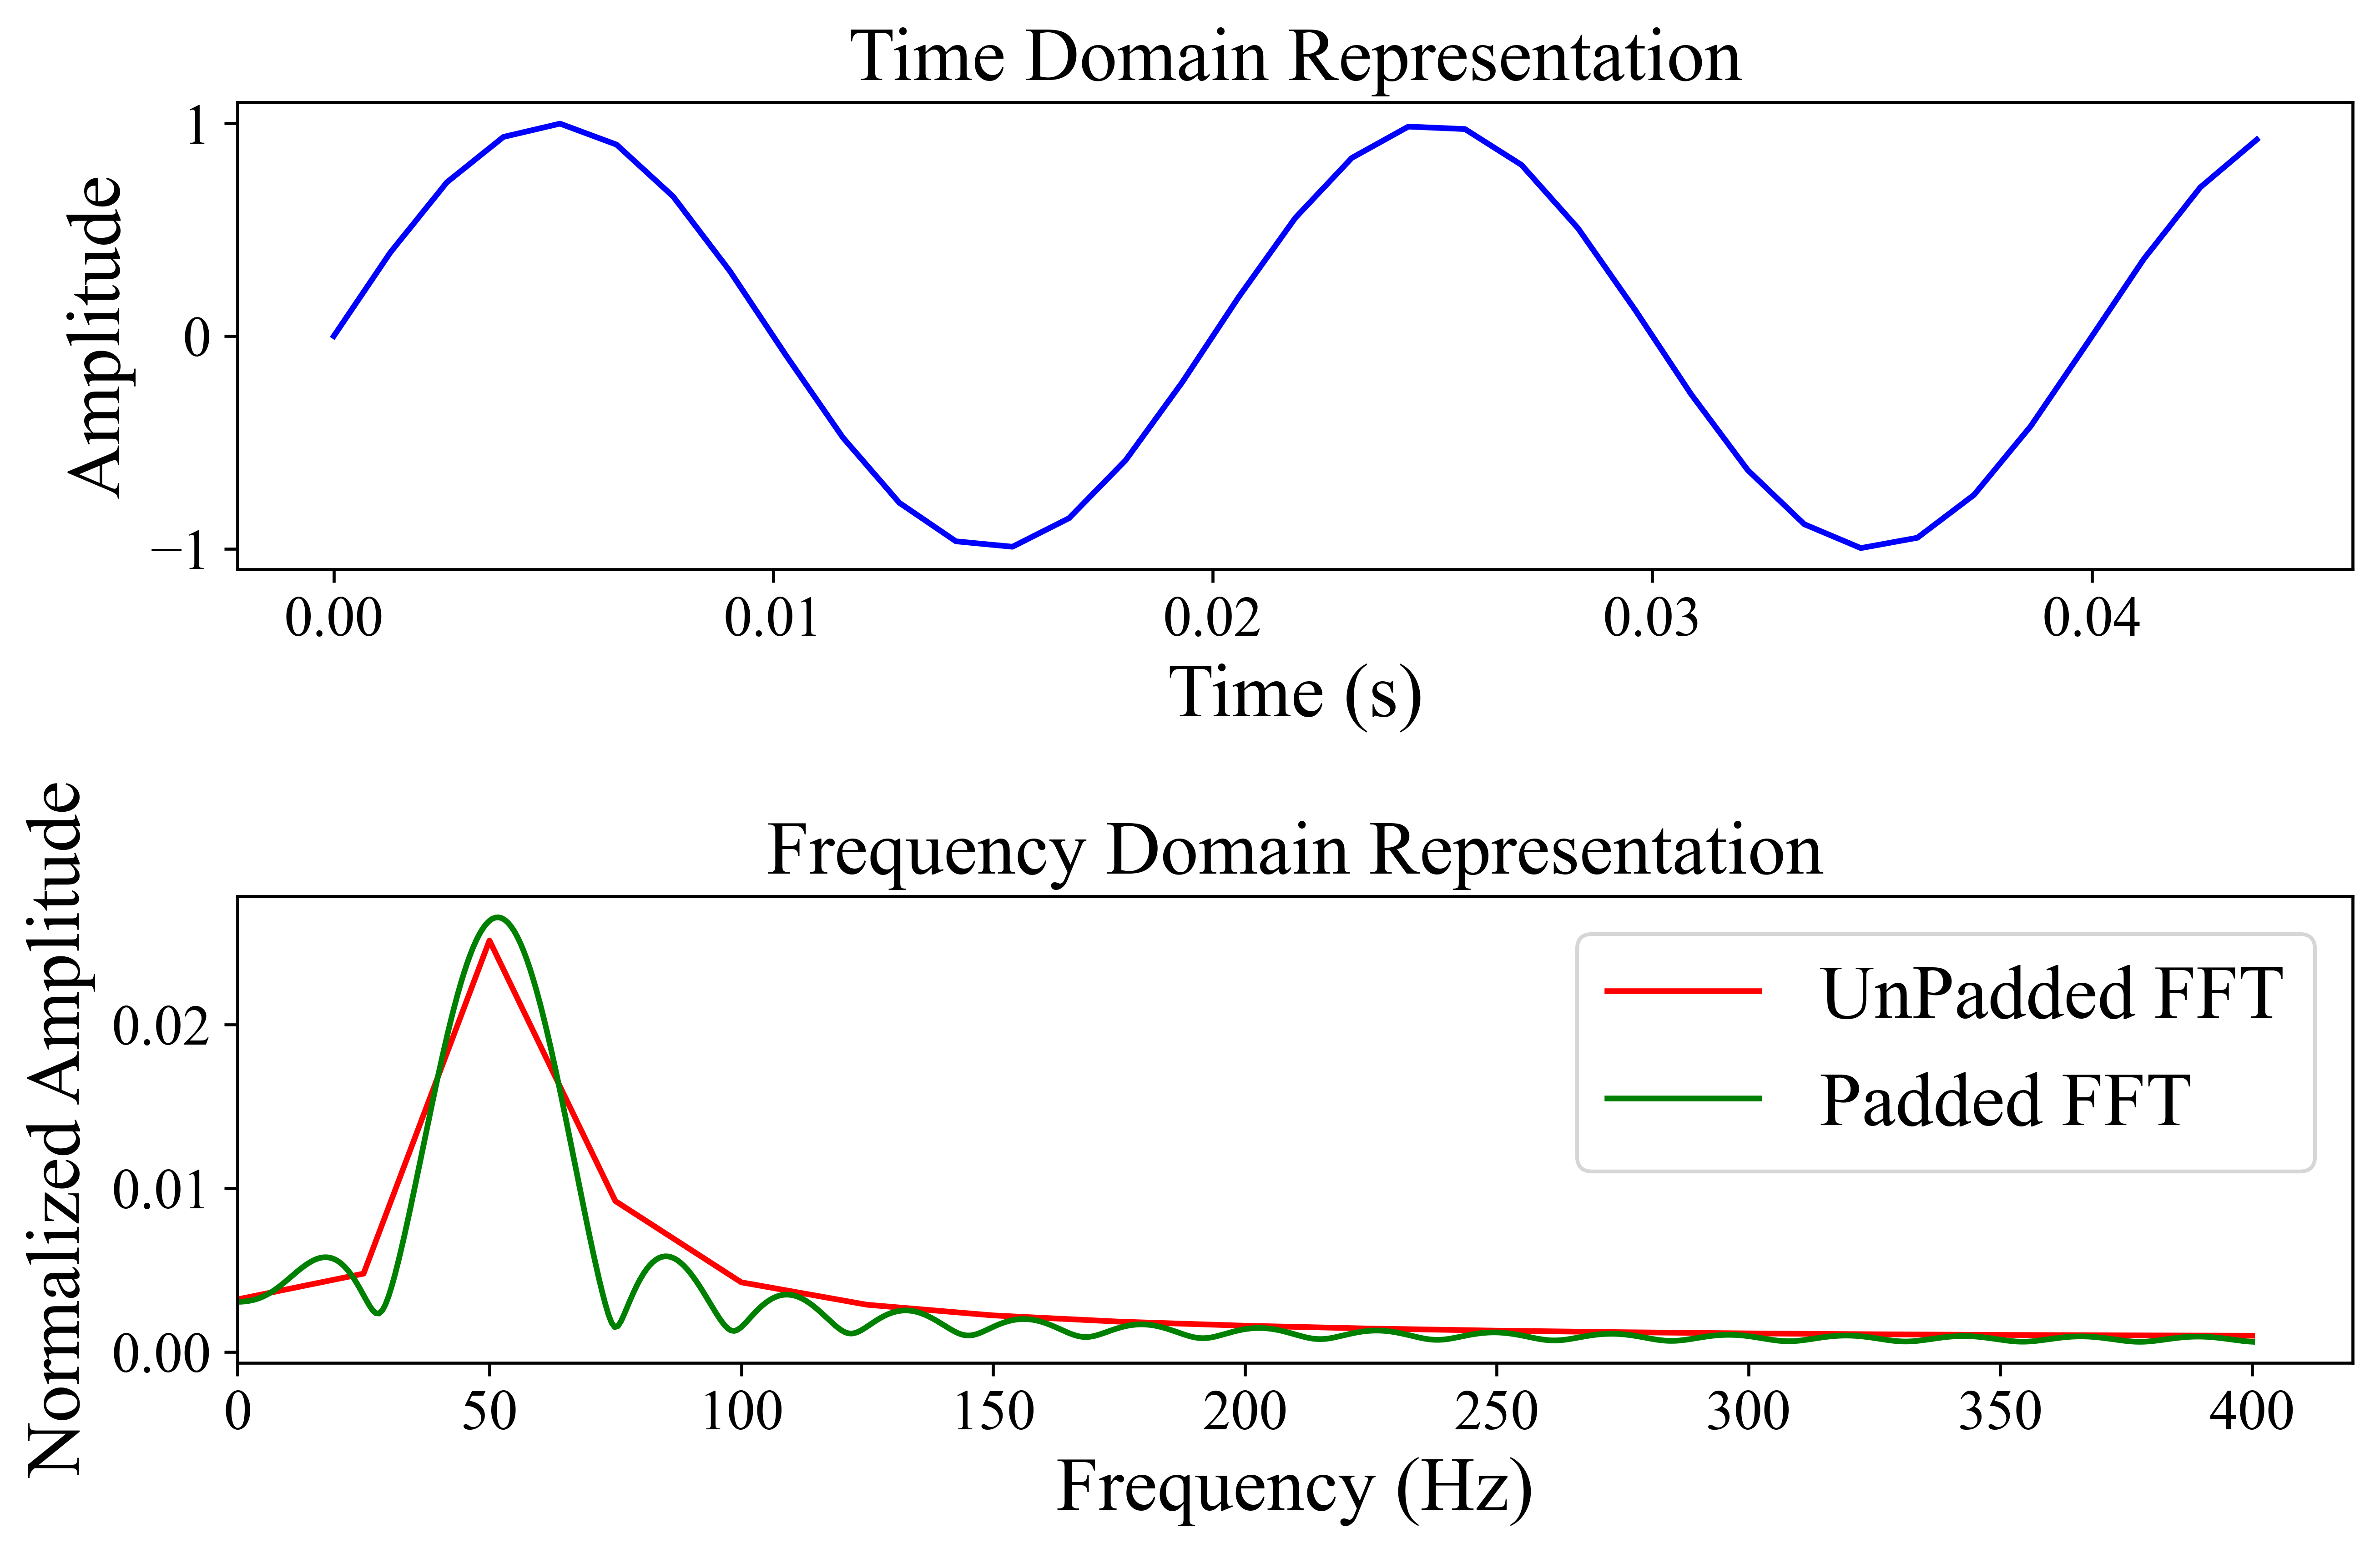

In [272]:
N = 35
T = 1.0 / 800.0
f = 50.0

x = np.linspace(0.0, N*T, N)
y = np.sin(f * 2.0*np.pi*x)

# Zero-padding (adding zero)
zeroN =1250
totalN = zeroN + N
zeropadded_y = np.zeros(zeroN + N)
zeropadded_y[:N] = y

yf_padded = fft(zeropadded_y)
xf_padded = np.linspace(0.0, 1.0/(2.0*T), int(totalN/2))

yf_unpadded = fft(y)/N
xf_unpadded = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.7)

ax1.plot(x, y, 'blue')
ax1.set_xlabel('Time (s)', fontsize=20)
ax1.set_ylabel('Amplitude', fontsize=20)
ax1.set_title('Time Domain Representation',fontsize=20)
ax1.tick_params(axis='both', labelsize=15)

ax2.plot(xf_unpadded, 2.0/N * np.abs(yf_unpadded[0:int(N/2)]), 'red')
ax2.plot(xf_padded, 2.0/totalN * np.abs(yf_padded[0:int(totalN/2)]), 'green')
ax2.plot()
ax2.set_xlim(0, )
ax2.set_xlabel('Frequency (Hz)', fontsize=20)
ax2.set_ylabel('Normalized Amplitude', fontsize=20)
ax2.set_title('Frequency Domain Representation', fontsize=20)
ax2.tick_params(axis='both', labelsize=15)
ax2.legend(['UnPadded FFT', 'Padded FFT'], fontsize=20)
plt.show()

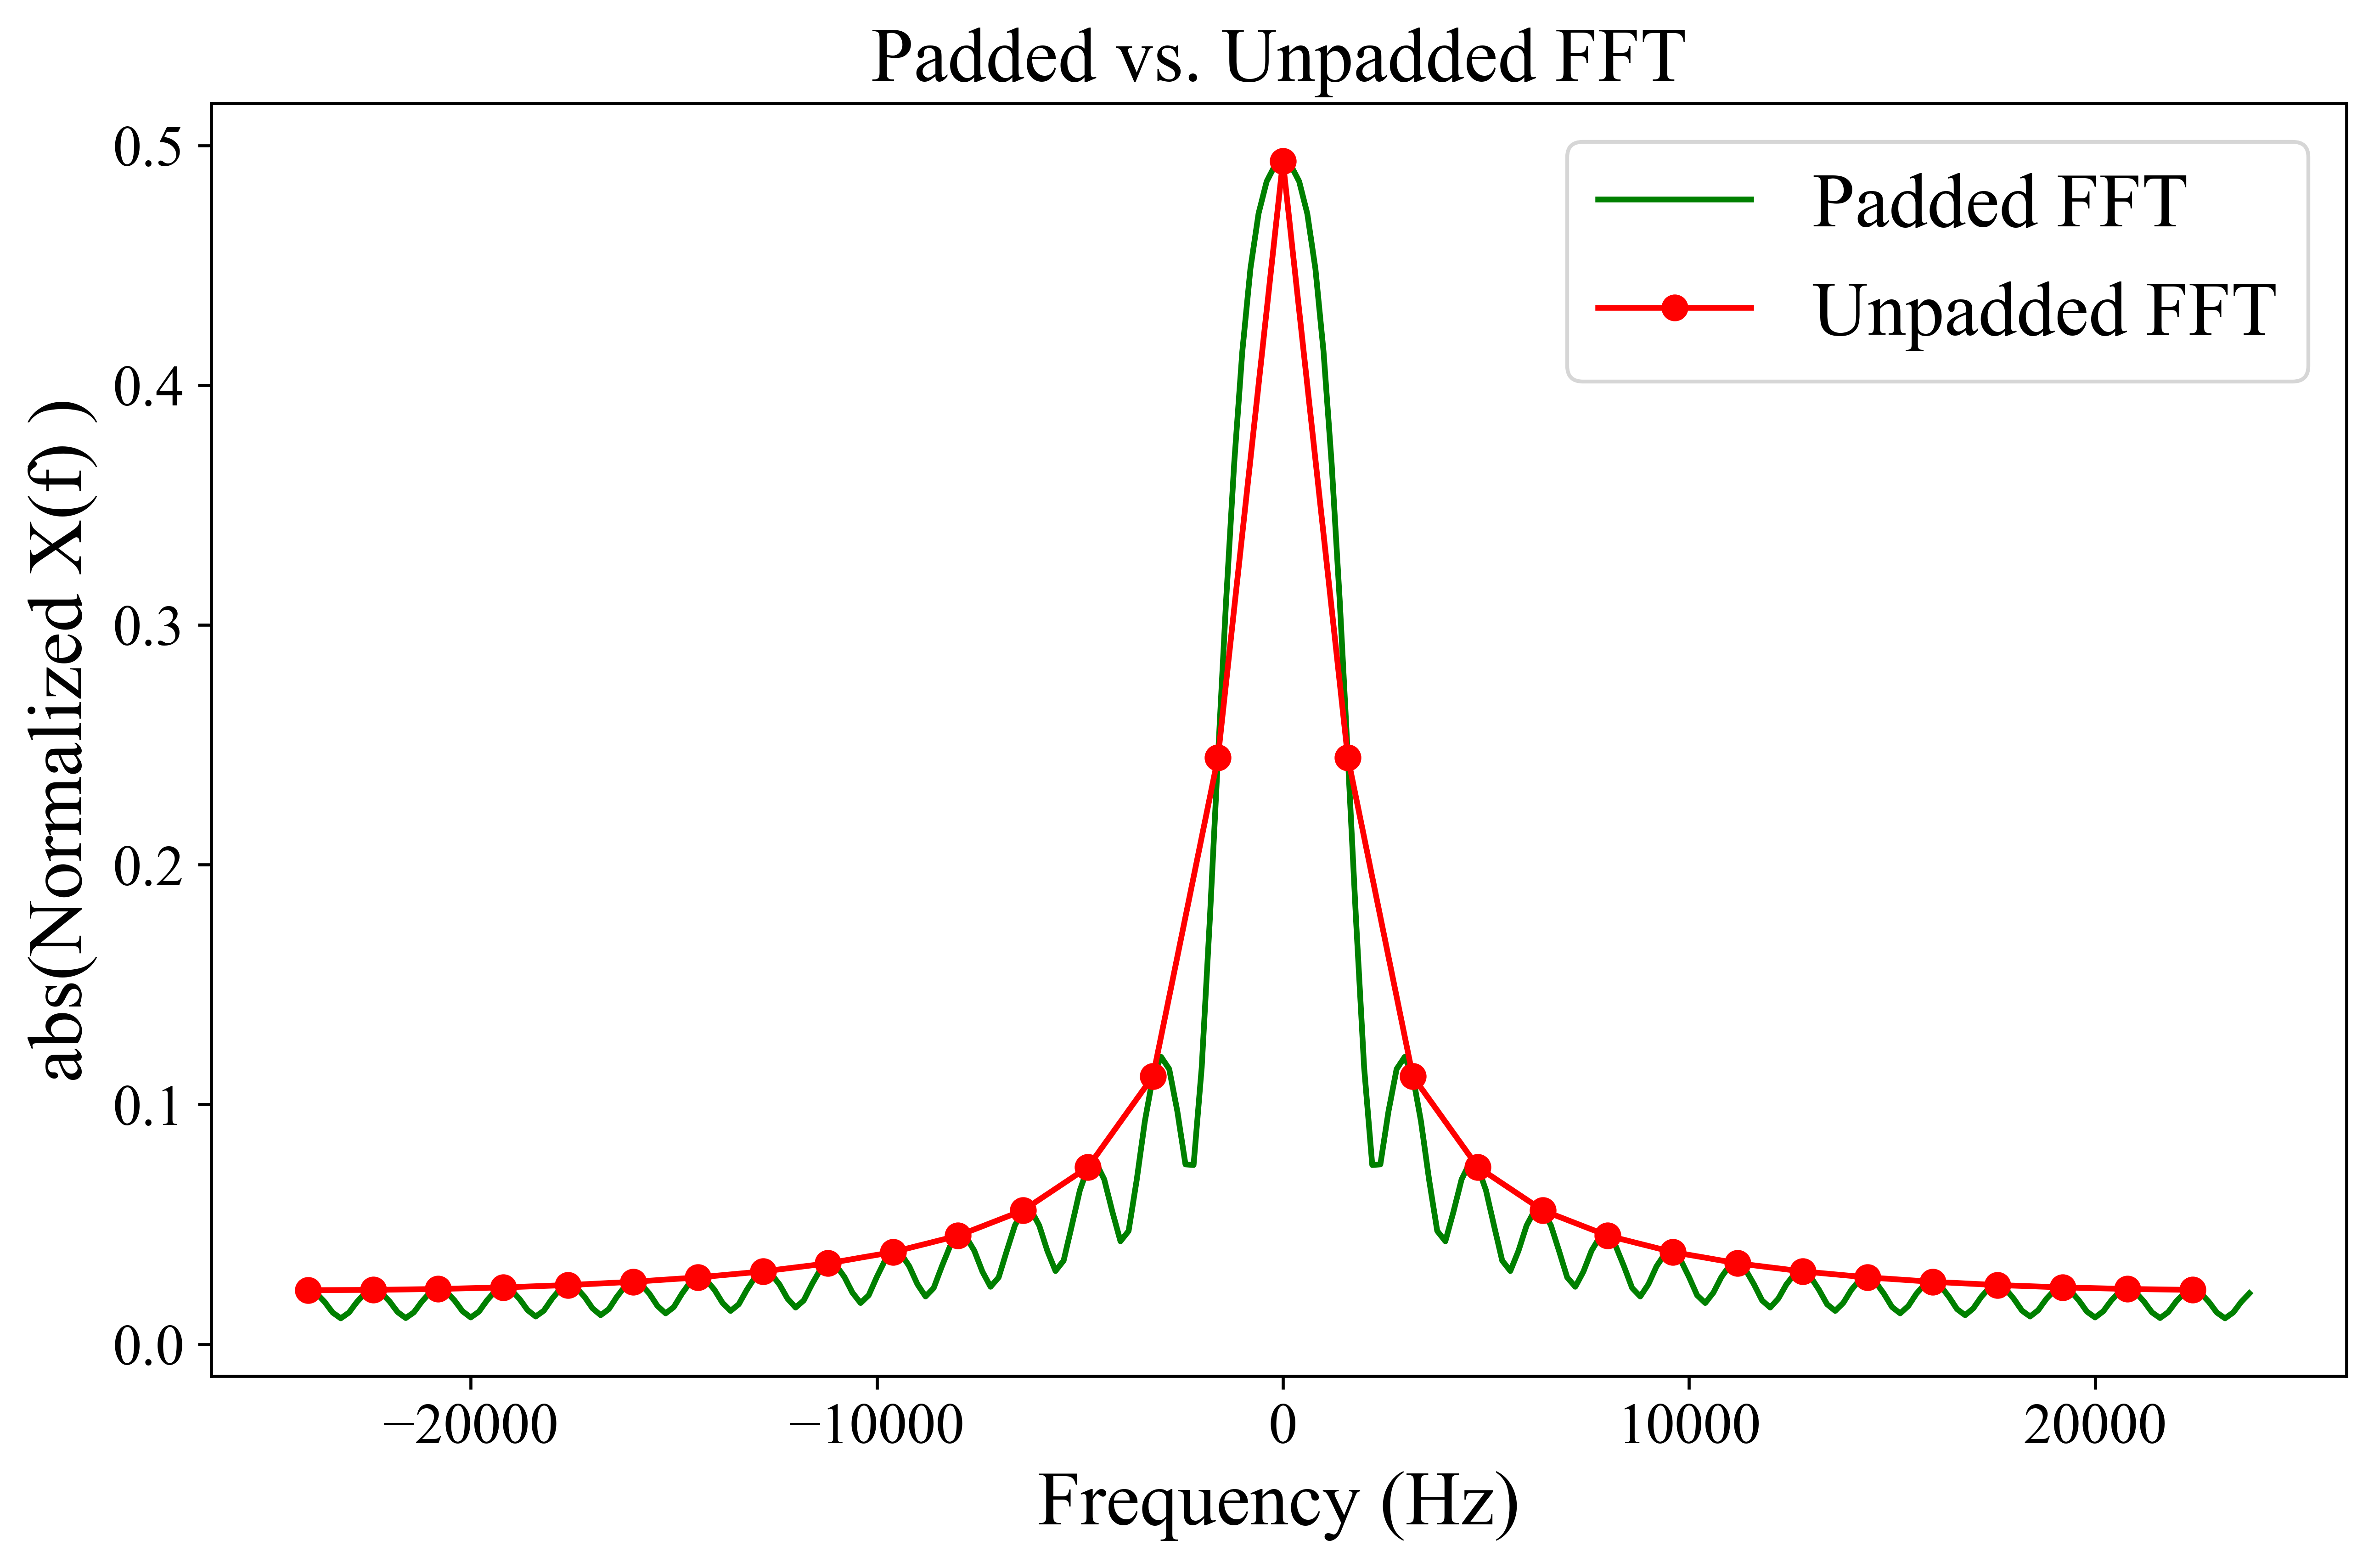

In [274]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['figure.dpi'] = 600

Fs = 48e3                          # Sampling rate (Hz)
f0 = 5e2                           # Center frequency
N = 3e1                           # Samples in time series
K = 8                              # Zero-pad factor

# Generate N time indices
t = np.arange(0, N) / Fs

# Create a sinusoid signal of length N*Fs at f0 Hz
x = np.cos(2 * np.pi * f0 * t) / N

# Create a zero-padded version of x
xpad = np.concatenate([x, np.zeros((K - 1) * len(x))])

# Helper function for plotting FFT
def plotFFT(x, N, Fs, spec):
    # plt.plot(Fs * np.fft.fftshift(np.fft.fftfreq(N, 1/Fs)) - Fs/2, np.abs(np.fft.fftshift(np.fft.fft(x))), spec)
    plt.plot(Fs * (np.arange(0, N)/N) - Fs/2, np.abs(np.fft.fftshift(np.fft.fft(x))), spec)
# Fs*(0:N-1)/N-Fs/2
# Plot padded FFT vs unpadded FFT
plt.figure(1, figsize=(10,6))
plotFFT(xpad, len(xpad), Fs, 'green')
plotFFT(x, len(x), Fs, '-ro')
plt.title('Padded vs. Unpadded FFT', fontsize=20)
plt.legend(['Padded FFT', 'Unpadded FFT'], fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('abs(Normalized X(f) )', fontsize=20)
plt.show()
